In [6]:
import os
from pathlib import Path
import sys

pwd = Path(os.getcwd())
if (pwd.name == "eda"):
    sys.path.append(str(pwd.parent / "gym-checkers-for-thai"))
else:
    sys.path.append(str(pwd / "gym-checkers-for-thai"))

In [7]:
from checkers.agents.baselines import play_a_game, RandomPlayer
from checkers.game import Checkers
from checkers.agents import Player
from checkers.agents.alpha_beta import MinimaxPlayer, first_order_adv, material_value_adv
from checkers.agents.mcts import MctsPlayer

from functools import partial
from tqdm import tqdm
import copy
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
def run_experiment(black_player,
                   white_player,
                   max_game_len=500,
                   n_matches=10,):

    black_win = 0
    white_win = 0
    draw = 0

    looper = tqdm(range(n_matches), unit='matches')
    for i in looper:
        ch = Checkers()
    
        #modify this function to put our RL model as white
        current_black_player = copy.deepcopy(black_player)
        current_white_player = copy.deepcopy(white_player)

        winner = play_a_game(ch, current_black_player.next_move, current_white_player.next_move, max_game_len, verbose=False)

        black_win += winner == 'black'
        white_win += winner == 'white'
        draw += winner is None
    
        looper.set_postfix(black_win=black_win, white_win=white_win, draw=draw)

    return black_win, white_win, draw

In [34]:
MAX_SEARCH_DEPTH = 5

'''
dim info:
    0: black search depth - 1
    1: white search depth - 1
    2: [black win, white win, draw, running time]
'''

result_df = pd.DataFrame(columns=['black_search_depth',
                                  'white_search_depth',
                                  'black_win',
                                  'white_win',
                                  'draw',
                                  'running_time(s)'])

for black_sd, white_sd in [(i, j) for i in range(1, MAX_SEARCH_DEPTH+1) for j in range(1, MAX_SEARCH_DEPTH+1)]:
    black_player = MinimaxPlayer('black',
                                 search_depth=black_sd)
    white_player = MinimaxPlayer('white',
                                 search_depth=white_sd)
    
    print(f'black search depth: {black_sd}, white search depth: {white_sd}')

    stime = time.time()
    black_win, white_win, draw = run_experiment(black_player, white_player, n_matches=10, max_game_len=200)
    etime = time.time()

    del black_player
    del white_player

    result_df.loc[len(result_df)] = [black_sd, white_sd, black_win, white_win, draw, etime - stime]
    if False:
        result_df.to_csv('minimax_vs_minimax_result.csv', index=False)

black search depth: 1, white search depth: 1


100%|██████████| 10/10 [00:00<00:00, 40.71matches/s, black_win=6, draw=0, white_win=4]


black search depth: 1, white search depth: 2


100%|██████████| 10/10 [00:00<00:00, 10.56matches/s, black_win=0, draw=0, white_win=10]


black search depth: 1, white search depth: 3


100%|██████████| 10/10 [00:05<00:00,  1.89matches/s, black_win=0, draw=0, white_win=10]


black search depth: 1, white search depth: 4


100%|██████████| 10/10 [00:28<00:00,  2.87s/matches, black_win=0, draw=0, white_win=10]


black search depth: 1, white search depth: 5


100%|██████████| 10/10 [03:26<00:00, 20.62s/matches, black_win=0, draw=0, white_win=10]


black search depth: 2, white search depth: 1


100%|██████████| 10/10 [00:00<00:00, 10.64matches/s, black_win=10, draw=0, white_win=0]


black search depth: 2, white search depth: 2


100%|██████████| 10/10 [00:05<00:00,  1.85matches/s, black_win=3, draw=2, white_win=5]


black search depth: 2, white search depth: 3


100%|██████████| 10/10 [00:10<00:00,  1.06s/matches, black_win=2, draw=0, white_win=8]


black search depth: 2, white search depth: 4


100%|██████████| 10/10 [01:09<00:00,  6.94s/matches, black_win=0, draw=1, white_win=9]


black search depth: 2, white search depth: 5


100%|██████████| 10/10 [06:52<00:00, 41.23s/matches, black_win=0, draw=1, white_win=9]


black search depth: 3, white search depth: 1


100%|██████████| 10/10 [00:04<00:00,  2.20matches/s, black_win=10, draw=0, white_win=0]


black search depth: 3, white search depth: 2


100%|██████████| 10/10 [00:12<00:00,  1.28s/matches, black_win=8, draw=1, white_win=1]


black search depth: 3, white search depth: 3


100%|██████████| 10/10 [00:10<00:00,  1.02s/matches, black_win=4, draw=0, white_win=6]


black search depth: 3, white search depth: 4


100%|██████████| 10/10 [03:30<00:00, 21.07s/matches, black_win=1, draw=2, white_win=7]


black search depth: 3, white search depth: 5


100%|██████████| 10/10 [08:12<00:00, 49.25s/matches, black_win=1, draw=1, white_win=8]


black search depth: 4, white search depth: 1


100%|██████████| 10/10 [00:27<00:00,  2.71s/matches, black_win=10, draw=0, white_win=0]


black search depth: 4, white search depth: 2


100%|██████████| 10/10 [04:40<00:00, 28.09s/matches, black_win=8, draw=0, white_win=2]


black search depth: 4, white search depth: 3


100%|██████████| 10/10 [02:10<00:00, 13.06s/matches, black_win=7, draw=1, white_win=2]


black search depth: 4, white search depth: 4


100%|██████████| 10/10 [05:01<00:00, 30.13s/matches, black_win=3, draw=0, white_win=7]


black search depth: 4, white search depth: 5


100%|██████████| 10/10 [20:18<00:00, 121.88s/matches, black_win=1, draw=0, white_win=9]


black search depth: 5, white search depth: 1


100%|██████████| 10/10 [13:17<00:00, 79.73s/matches, black_win=10, draw=0, white_win=0]


black search depth: 5, white search depth: 2


100%|██████████| 10/10 [17:57<00:00, 107.71s/matches, black_win=9, draw=1, white_win=0]


black search depth: 5, white search depth: 3


100%|██████████| 10/10 [31:21<00:00, 188.11s/matches, black_win=9, draw=0, white_win=1]


black search depth: 5, white search depth: 4


100%|██████████| 10/10 [53:17<00:00, 319.73s/matches, black_win=6, draw=2, white_win=2]  


black search depth: 5, white search depth: 5


100%|██████████| 10/10 [33:04<00:00, 198.49s/matches, black_win=8, draw=0, white_win=2]  


In [35]:
# result_df.to_csv('/pandas/minimax_vs_minimax_result.csv', index=False)

In [9]:
result_df = pd.read_csv('./pandas/minimax_vs_minimax_result.csv')

result_matrix = np.zeros((MAX_SEARCH_DEPTH, MAX_SEARCH_DEPTH, 4)) # black win, white win, draw, running time
for i in range(MAX_SEARCH_DEPTH):
    for j in range(MAX_SEARCH_DEPTH):
        result_matrix[i, j] = result_df[(result_df['black_search_depth'] == i+1) & (result_df['white_search_depth'] == j+1)].values[0][-4:]

# result_matrix[:, :, -1] /= 60

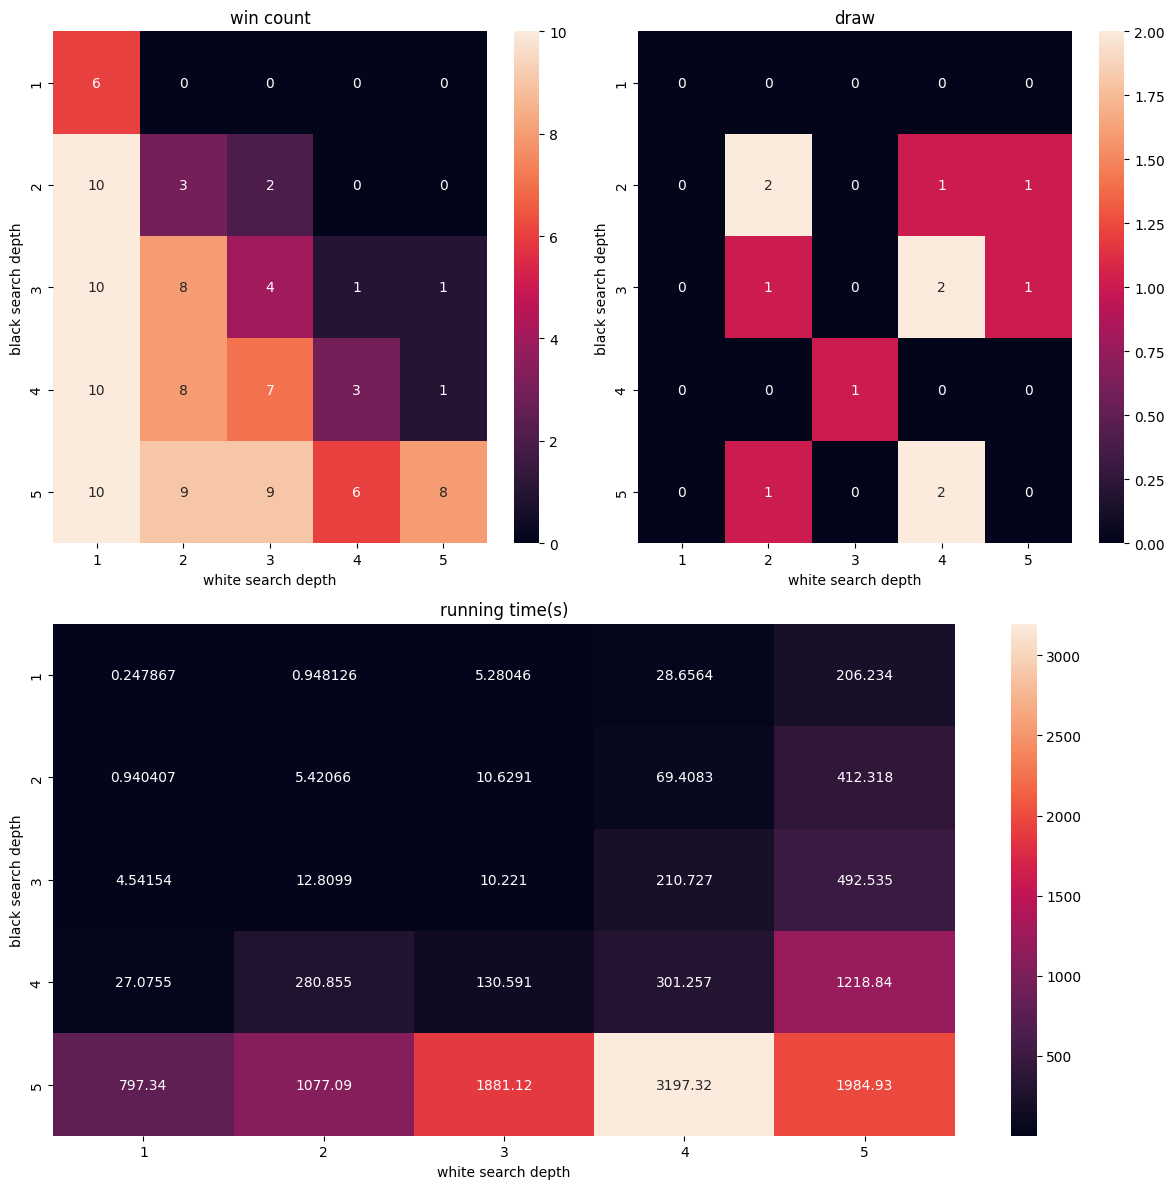

In [11]:
plt.figure(figsize=(12, 12))


plt.subplot(2, 2, 1)
sns.heatmap(result_matrix[:, :, 0], annot=True, fmt='g')
plt.title('win count')
plt.xticks(ticks=np.arange(0.5, MAX_SEARCH_DEPTH, 1), labels=np.arange(1, MAX_SEARCH_DEPTH+1))
plt.yticks(ticks=np.arange(0.5, MAX_SEARCH_DEPTH, 1), labels=np.arange(1, MAX_SEARCH_DEPTH+1))
plt.ylabel('black search depth')
plt.xlabel('white search depth')

plt.subplot(2, 2, 2)
sns.heatmap(result_matrix[:, :, 2], annot=True, fmt='g')
plt.title('draw')
plt.xticks(ticks=np.arange(0.5, MAX_SEARCH_DEPTH, 1), labels=np.arange(1, MAX_SEARCH_DEPTH+1))
plt.yticks(ticks=np.arange(0.5, MAX_SEARCH_DEPTH, 1), labels=np.arange(1, MAX_SEARCH_DEPTH+1))
plt.ylabel('black search depth')
plt.xlabel('white search depth')

plt.subplot(2, 2, (3, 4))
sns.heatmap(result_matrix[:, :, 3], annot=True, fmt='g')
plt.title('running time(s)')
plt.xticks(ticks=np.arange(0.5, MAX_SEARCH_DEPTH, 1), labels=np.arange(1, MAX_SEARCH_DEPTH+1))
plt.yticks(ticks=np.arange(0.5, MAX_SEARCH_DEPTH, 1), labels=np.arange(1, MAX_SEARCH_DEPTH+1))
plt.ylabel('black search depth')
plt.xlabel('white search depth')

plt.tight_layout()
plt.savefig('minimax_vs_minimax_result.png')

plt.show()